## Cifar - 100 MultiClass Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [82]:
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [84]:
class_names = ['apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly','camel','can','castle','caterpillar','cattle','chair','chimpanzee','clock','cloud','cockroach','couch','crab','crocodile','cup','dinosaur','dolphin','elephant','flatfish','forest','fox','girl','hamster','house','kangaroo','keyboard','lamp','lawn_mower','leopard','lion','lizard','lobster','man','maple_tree','motorcycle','mountain','mouse','mushroom','oak_tree','orange','orchid','otter','palm_tree','pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine','possum','rabbit','raccoon','ray','road','rocket','rose','sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider','squirrel','streetcar','sunflower','sweet_pepper','table','tank','telephone','television','tiger','tractor','train','trout','tulip','turtle','wardrobe','whale','willow_tree','wolf','woman','worm']

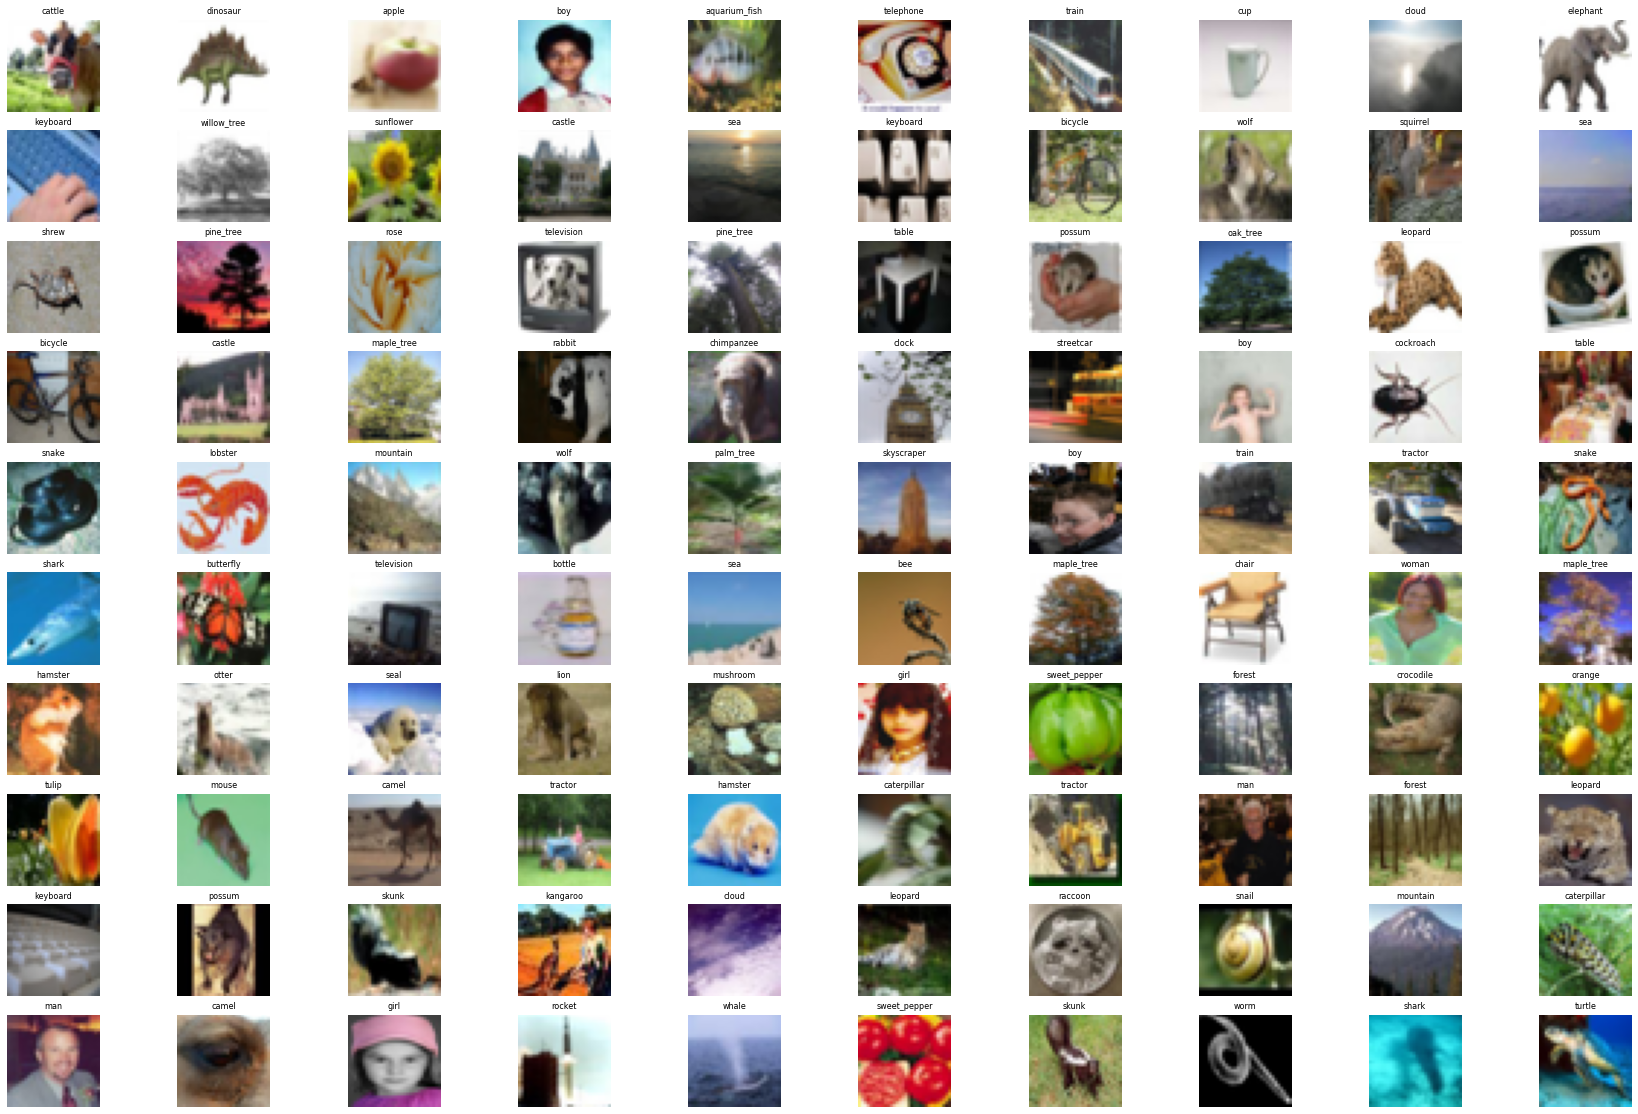

In [85]:
plt.figure(figsize=(30,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(X_train[i]), plt.axis('off')
    plt.title(class_names[y_train[i,0]], fontsize=8)
plt.show()

In [86]:
from tensorflow.keras.utils import to_categorical
X_train = X_train/255.
X_test = X_test/255.
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [87]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD

In [88]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_20 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_46 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_21 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                     

In [89]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, decay=1e-6, nesterov=True), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [78]:
# Course 1
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X_train, Y_train, stratify=Y_train, test_size=0.2, random_state=seed
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
augmenter = ImageDataGenerator(rescale=1.0/255.,
                             rotation_range=20,
                             width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             shear_range=0.1, 
                             zoom_range=0.2, 
                             fill_mode='nearest',
                             horizontal_flip=True)

augmenter.fit(X_train)

In [79]:
# Course 1, 2
model_path = './models/best_cifar_100.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [90]:
# Course 1
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[mc,es])

Epoch 1/100
1563/1563 [==============================] - ETA: 0s - loss: 4.0615 - accuracy: 0.0928
Epoch 00001: val_loss improved from 478.85437 to 3.44186, saving model to ./models\best_cifar_100.h5
1563/1563 [==============================] - 9s 6ms/step - loss: 4.0615 - accuracy: 0.0928 - val_loss: 3.4419 - val_accuracy: 0.1738
Epoch 2/100
1560/1563 [============================>.] - ETA: 0s - loss: 3.4522 - accuracy: 0.1777
Epoch 00002: val_loss improved from 3.44186 to 3.13109, saving model to ./models\best_cifar_100.h5
1563/1563 [==============================] - 9s 6ms/step - loss: 3.4517 - accuracy: 0.1778 - val_loss: 3.1311 - val_accuracy: 0.2470
Epoch 3/100
1556/1563 [============================>.] - ETA: 0s - loss: 3.1485 - accuracy: 0.2298
Epoch 00003: val_loss improved from 3.13109 to 2.85218, saving model to ./models\best_cifar_100.h5
1563/1563 [==============================] - 9s 5ms/step - loss: 3.1485 - accuracy: 0.2299 - val_loss: 2.8522 - val_accuracy: 0.2999
Epoch

In [80]:
# Course 2
history = model.fit(
    augmenter.flow(X_train, Y_train, batch_size=32),
    validation_data=(X_valid, Y_valid),
    epochs=100, callbacks=[mc, es]
)

Epoch 1/100
 998/1000 [============================>.] - ETA: 0s - loss: 4.2929 - accuracy: 0.0616
Epoch 00001: val_loss improved from inf to 1377.82581, saving model to ./models\best_cifar_100.h5
1000/1000 [==============================] - 13s 12ms/step - loss: 4.2925 - accuracy: 0.0616 - val_loss: 1377.8258 - val_accuracy: 0.0154
Epoch 2/100
 998/1000 [============================>.] - ETA: 0s - loss: 3.8302 - accuracy: 0.1124
Epoch 00002: val_loss improved from 1377.82581 to 1270.72400, saving model to ./models\best_cifar_100.h5
1000/1000 [==============================] - 12s 12ms/step - loss: 3.8297 - accuracy: 0.1125 - val_loss: 1270.7240 - val_accuracy: 0.0216
Epoch 3/100
 998/1000 [============================>.] - ETA: 0s - loss: 3.6291 - accuracy: 0.1466
Epoch 00003: val_loss improved from 1270.72400 to 1227.86169, saving model to ./models\best_cifar_100.h5
1000/1000 [==============================] - 12s 12ms/step - loss: 3.6286 - accuracy: 0.1467 - val_loss: 1227.8617 - va

In [91]:
best_model = load_model(model_path)
# Course 1
best_model.evaluate(X_test, y_test)
# Course 2
# best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.9029 - accuracy: 0.5051


[1.9029390811920166, 0.5051000118255615]